In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as n
import glob
from astropy.io import fits
from scipy.interpolate import interp1d
import pickle

In [2]:
m2micron = 1e6       #[microns/meters]
c = 2.99792458e8     #[m/s]

def convert_Jy_to_F_lam(wave_arr, flux_arr):
    
    #flux_arr input array in jansky
    #wave_arr input array in microns
    
    wave_arr_meters = wave_arr/m2micron        #meters
    flux_arr *= 1e-26           #[W/m^2/Hz]
    flux_arr *= c/(wave_arr_meters**2) #[W/m^2/m]
    flux_arr /= m2micron        #[W/m^2/microns] 
    
    return flux_arr

In [3]:
spectra_files = glob.glob('*/spectra/*h.txt')
spectra_files

['F170LP_G235H_current_pipeline/spectra/detector1_f170lp_g235h.txt',
 'F170LP_G235H_current_pipeline/spectra/detector2_f170lp_g235h.txt',
 'F100LP_G140H_current_pipeline/spectra/detector1_f100lp_g140h.txt',
 'F100LP_G140H_current_pipeline/spectra/detector2_f100lp_g140h.txt',
 'F290LP_G395H_current_pipeline/spectra/detector2_f290lp_g395h.txt',
 'F290LP_G395H_current_pipeline/spectra/detector1_f290lp_g395h.txt']

In [4]:
data = fits.open('/Users/zen/projects/JWST_Observations_VHS1256b/reduction/nirspec_a_star/cal_data/1808347_mod_004.fits')  ##TYC 4433-1900-1 (HST number 1808347)
star_wavelength = data['SCI'].data['WAVELENGTH'] #Angstrom
star_flux = data['SCI'].data['FLUX']  # Flux(erg s-1 cm-2 Ang-1)    


star_flux = (3.34 * 1e4) * (star_wavelength**2) * star_flux #Jy'
star_wavelength = star_wavelength * 0.0001  #microns
star_flux = convert_Jy_to_F_lam(star_wavelength, star_flux)  #[W/m^2/microns] 

<IPython.core.display.Javascript object>


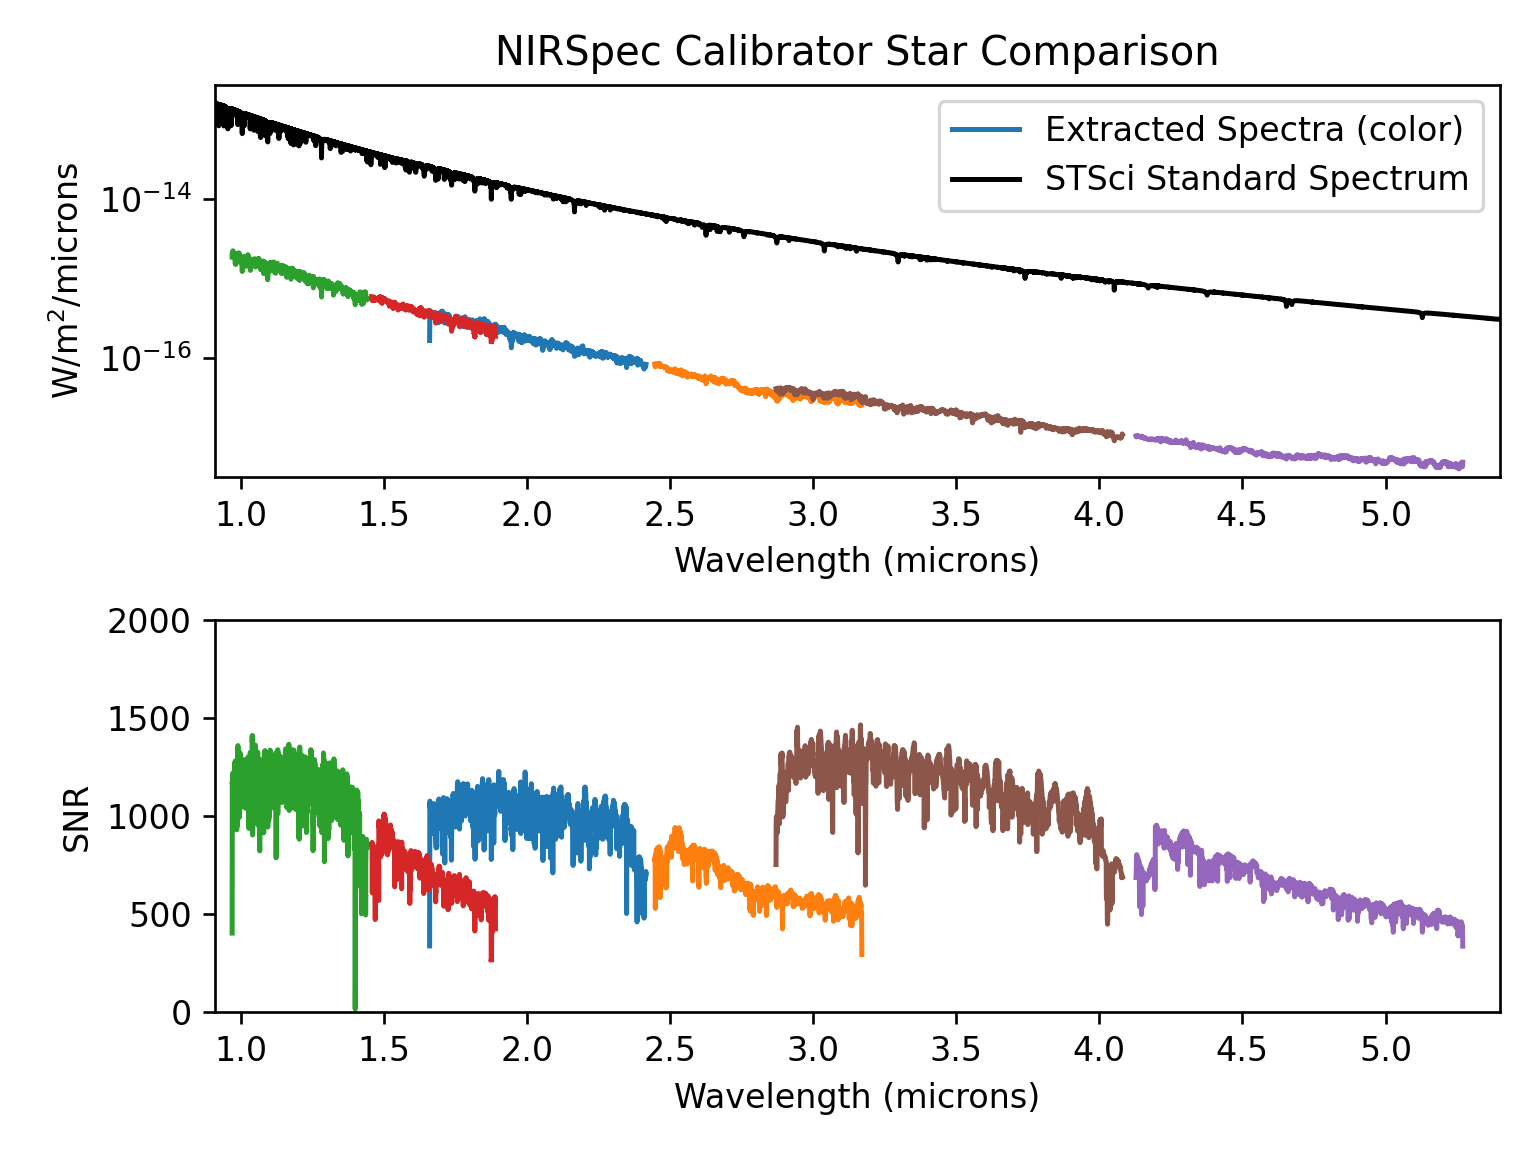

In [7]:
%matplotlib notebook
for i, file in enumerate(spectra_files):
    data = n.genfromtxt(file)
    
    wavelength = data[:,0]
    flux = data[:,1]/1e2
    flux_err = data[:,2]/1e2
    
    snr = flux/flux_err
    
    
    flux = convert_Jy_to_F_lam(wavelength, flux) #[W/m^2/microns] 
    
    if i == 0:
        plt.subplot(211)
        plt.plot(wavelength, flux, label = 'Extracted Spectra (color)')
         
        plt.subplot(212)
        plt.plot(wavelength, snr)
        
    else:
        plt.subplot(211)
        plt.plot(wavelength, flux)
        
        plt.subplot(212)
        plt.plot(wavelength, snr)
        
    
    
plt.subplot(211)
plt.yscale('log')
plt.title('NIRSpec Calibrator Star Comparison')
plt.ylabel('W/m$^2$/microns')
plt.xlabel('Wavelength (microns)')
plt.xlim([.910, 5.4])

plt.plot(star_wavelength, star_flux, 'k-', label = 'STSci Standard Spectrum')
plt.ylim([3.14e-18, 2.8e-13 ])
plt.legend()


plt.subplot(212)
plt.xlim([.910, 5.4])
#plt.ylim([0,250])
plt.ylabel('SNR')
plt.xlabel('Wavelength (microns)')
plt.tight_layout()
plt.ylim([0,2000])
plt.show()
